# Logistic regression using Newton's method

In [108]:
import matplotlib.pyplot as plot
import numpy as np
from utility import load_dataset

In [96]:
def sigmoid(x, Θ_1, Θ_2):
    z = (Θ_1 * x + Θ_2).astype("float_")
    return 1.0 / (1.0 + np.exp(-z))

In [97]:
def log_likelihood(x, y, Θ_1, Θ_2):
    sigmoid_probs = sigmoid(x, Θ_1, Θ_2)
    return np.sum(y * np.log(sigmoid_probs)
                  + (1 - y) * np.log(1 - sigmoid_probs))

In [98]:
def gradient(x, y, Θ_1, Θ_2):
    sigmoid_probs = sigmoid(x, Θ_1, Θ_2)
    return np.array([[np.sum((y - sigmoid_probs) * x), 
                      np.sum((y - sigmoid_probs) * 1)]])

In [99]:
def hessian(x, y, Θ_1, Θ_2):
    sigmoid_probs = sigmoid(x, Θ_1, Θ_2)
    d1 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * x * x)
    d2 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * x * 1)
    d3 = np.sum((sigmoid_probs * (1 - sigmoid_probs)) * 1 * 1)
    H = np.array([[d1, d2], [d2, d3]])
    return H

In [100]:
def newtons_method(x, y):
    # Initialize log_likelihood & parameters
    Θ_1 = 15.1
    Θ_2 = -.4  # The intercept term
    Δl = np.Infinity
    l = log_likelihood(x, y, Θ_1, Θ_2)
    # Convergence Conditions
    δ = .0000000001
    max_iterations = 15
    i = 0
    while abs(Δl) > δ and i < max_iterations:
        i += 1
        g = gradient(x, y, Θ_1, Θ_2)
        hess = hessian(x, y, Θ_1, Θ_2)
        H_inv = np.linalg.inv(hess)
        # @ is syntactic sugar for np.dot(H_inv, g.T)¹
        Δ = H_inv @ g.T
        ΔΘ_1 = Δ[0][0]
        ΔΘ_2 = Δ[1][0]

        # Perform our update step
        Θ_1 += ΔΘ_1
        Θ_2 += ΔΘ_2

        # Update the log-likelihood at each iteration
        l_new = log_likelihood(x, y, Θ_1, Θ_2)
        Δl = l - l_new
        l = l_new
    return np.array([Θ_1, Θ_2])

In [101]:
def plot_logistic(x_vals, y_vals):
    print(x_vals, y_vals)
    coefficients = newtons_method(x_vals, y_vals)
    print(coefficients)
    print(sigmoid(x_vals[0], coefficients[0], coefficients[1]))
    est_yvals = sigmoid(x_vals, coefficients[0], coefficients[1])
    print(est_yvals)
    # plot regression line
    plot.plot(x_vals, est_yvals, label=f"Logistic fit")

## Method to display summary statistics

In [102]:
def display_statistics(x_vals, y_vals):
    print("Mean(x)=%s Mean(Y)=%s" % (np.mean(x_vals), np.mean(y_vals)))
    print("Median(x)=%s Median(Y)=%s" % (np.median(x_vals), np.median(y_vals)))
    print("StdDev(x)=%s StdDev(Y)=%s" % (np.std(x_vals), np.std(y_vals)))
    print("Var(x)=%s Var(Y)=%s" % (np.var(x_vals), np.var(y_vals)))
    print("Cov(x,y)=%s" % np.cov(x_vals, y_vals))
    print("Cor(x,y)=%s" % np.correlate(x_vals, y_vals))

## Plot data (x and y values) together with regression lines

In [110]:
def plot_data(x_vals, y_vals):
    # plot measurement values
    plot.plot(x_vals, y_vals, "bo", label="Measured displacements")
    plot.title("Measurement Displacement of Spring", fontsize="x-large")
    plot.xlabel("|Force| (Newtons)")
    plot.ylabel("Distance (meters)")
    plot_logistic(x_vals, y_vals)
    display_statistics(x_vals, y_vals)

SyntaxError: invalid syntax (<ipython-input-110-a27d094c0d61>, line 1)

[[ 4.   4.   9.  ... 17.   1.3  0. ]
 [ 5.   4.   8.  ... 43.   6.3  0. ]
 [ 4.   4.   3.  ... 46.   5.8  0. ]
 ...
 [ 8.   6.   8.  ... 41.   5.8  0. ]
 [ 2.   5.   9.  ... 46.   3.1  0. ]
 [ 3.   4.   8.  ... 84.   7.6  0. ]] 0      0
1      1
2      0
3      0
4      0
      ..
511    1
512    0
513    1
514    1
515    1
Name: 0.1, Length: 516, dtype: int64


ValueError: operands could not be broadcast together with shapes (516,) (516,12) 

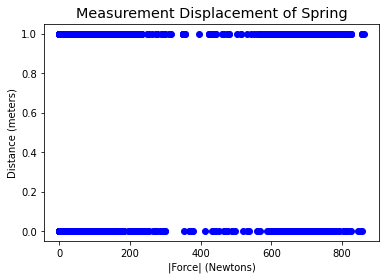

In [112]:
dataset, target = load_dataset("data/forestfires.csv")
plot_data(dataset, target)
plot.legend(loc="best")
plot.tight_layout()
plot.show()